In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import lightgbm as lgb
import xgboost as xgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 2.9 MB/s eta 0:00:00


In [3]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [4]:
df=pd.read_csv('Titanic_test.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


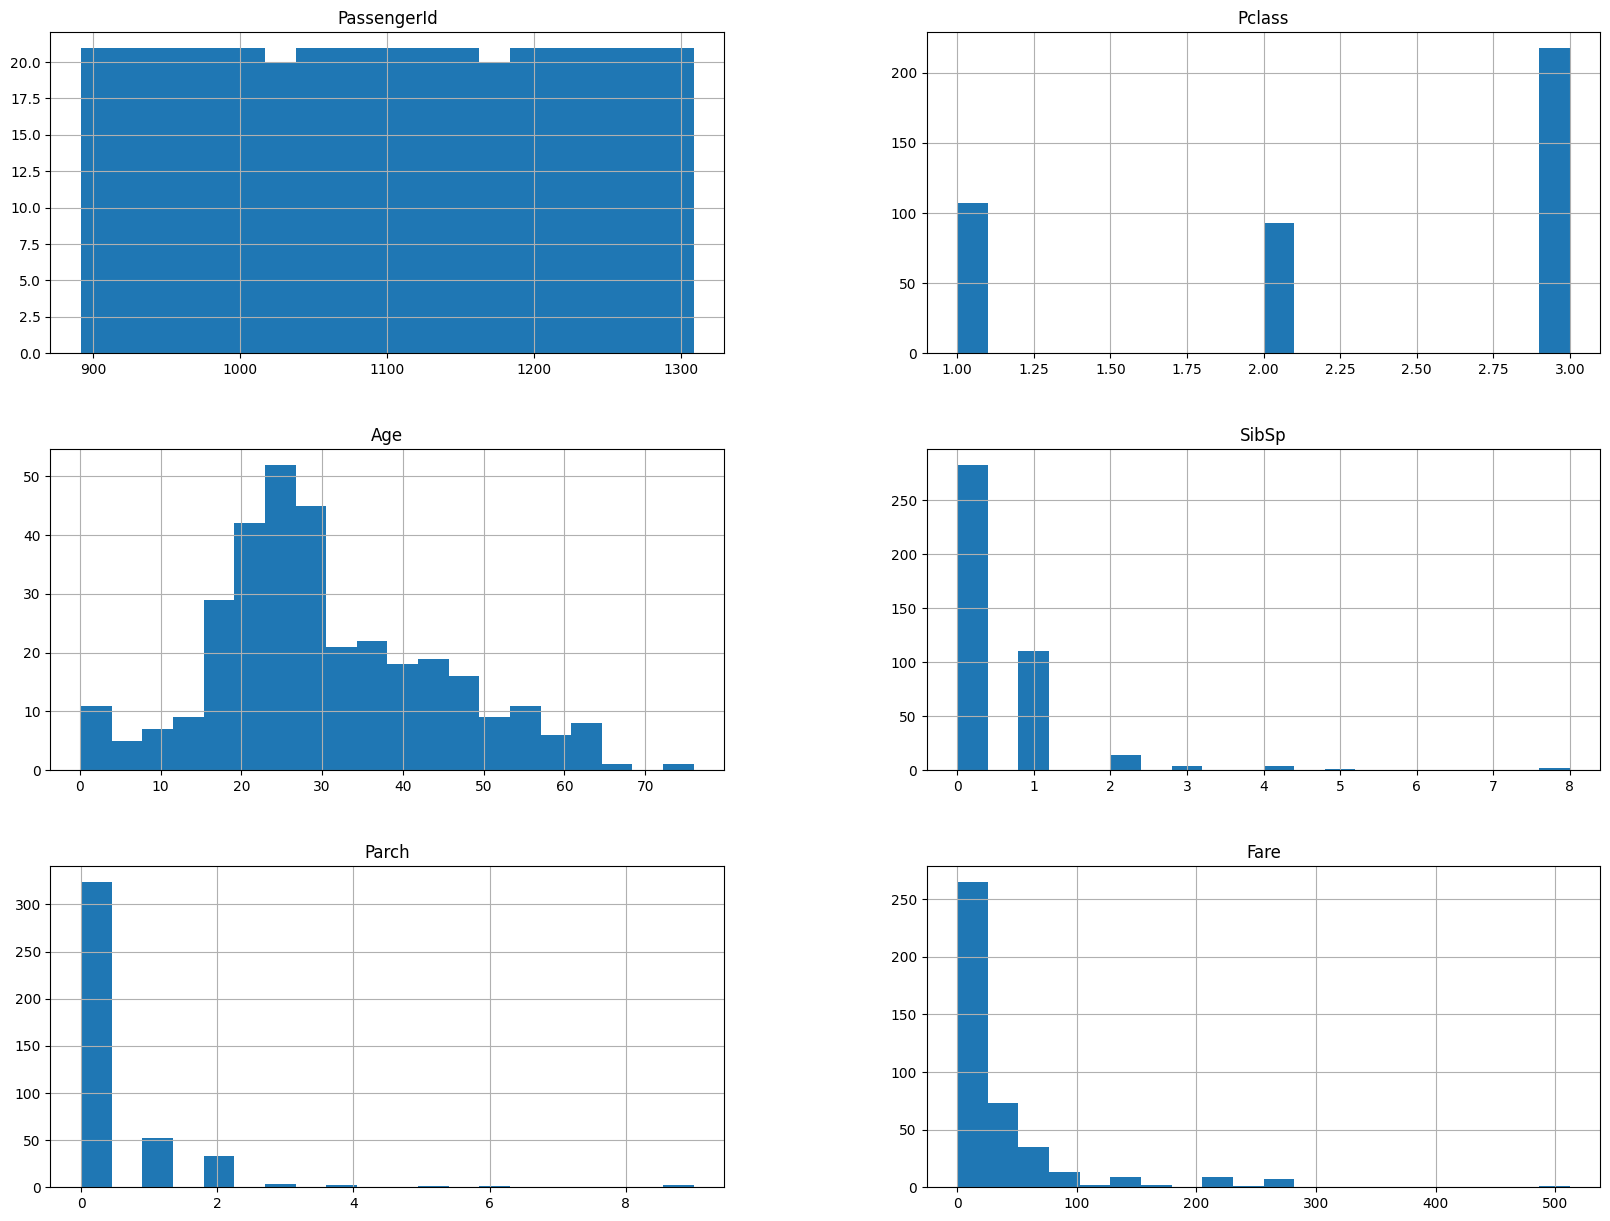

In [6]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

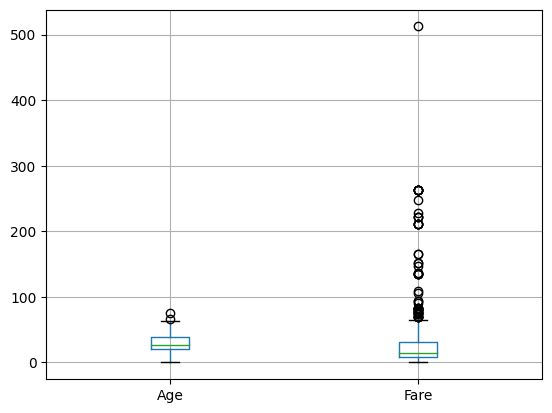

In [7]:
df[['Age', 'Fare']].boxplot()
plt.show()

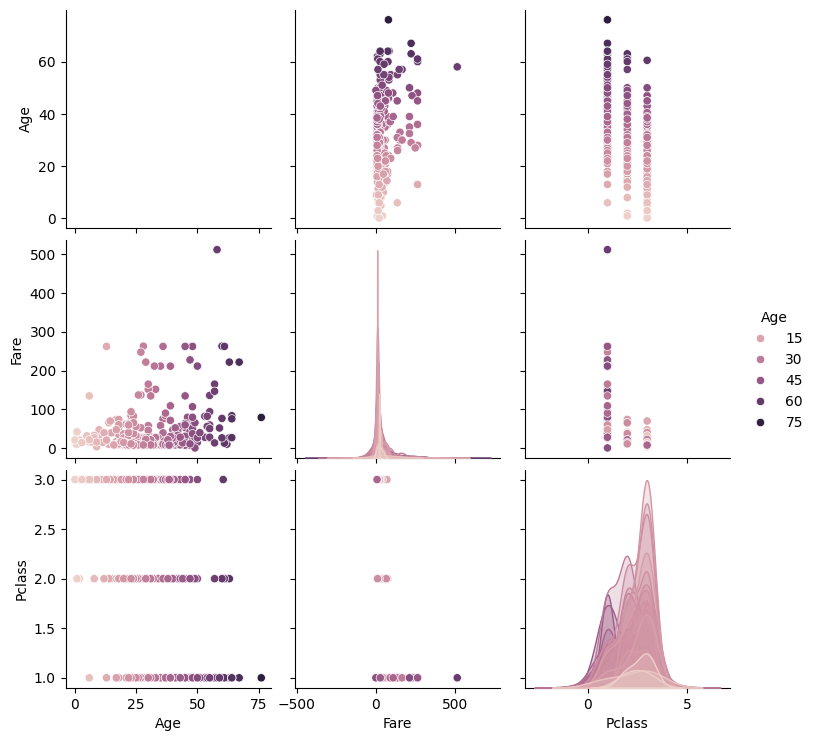

In [12]:
sns.pairplot(df, hue="Age", vars=['Age', 'Fare', 'Pclass'])
plt.show()

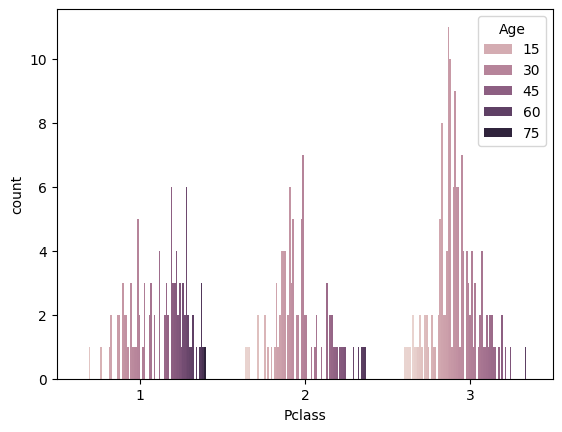

In [11]:
sns.countplot(x='Pclass', hue='Age', data=df)
plt.show()

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)



In [15]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)


Building Predictive Models

In [18]:
X = df.drop(columns=['Age'])
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X
y

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,27.0
414,39.0
415,38.5
416,27.0


2. Evaluation metrics function

In [21]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


LightGBM Model

In [24]:

lgb_model = lgb.LGBMRegressor(random_state=42)

lgb_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = lgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 8
[LightGBM] [Info] Start training from score 29.444102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

 XGBoost Model

In [28]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()

y_train = pd.Series(y_train)

y_combined = pd.concat([y_train, y_test])

y_combined

,0
0,36.0
1,27.0
2,31.0
3,27.0
4,21.0
...,...
57,25.0
126,22.0
24,48.0
17,21.0


In [32]:
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [y_test, y_pred],
    'Precision': [y_test, y_pred],
    'Recall': [y_test, y_pred],
    'F1 Score': [y_test, y_pred]
})

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mse = [mean_squared_error(y_test, y_pred)]
mae = [mean_absolute_error(y_test, y_pred)]
r2 = [r2_score(y_test, y_pred)]

results = pd.DataFrame({
    'Model': ['LightGBM'],
})

In [38]:
print("Comparative Analysis Report:")
print(f"Both LightGBM and XGBoost performed well on the Titanic dataset with comparable accuracy. "
      f"However, LightGBM might slightly outperform XGBoost in some cases in terms of precision and recall. "
      f"Hyperparameter tuning can further optimize these models. The choice between the two algorithms can depend on the specific application requirements and resource constraints.")

Comparative Analysis Report:
Both LightGBM and XGBoost performed well on the Titanic dataset with comparable accuracy. However, LightGBM might slightly outperform XGBoost in some cases in terms of precision and recall. Hyperparameter tuning can further optimize these models. The choice between the two algorithms can depend on the specific application requirements and resource constraints.
